<a href="https://colab.research.google.com/github/robcovino/IntroBiomolecularSimulations/blob/main/FromEntropy2Boltzmann_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

# From Shannon's Entropy to the Boltzmann distribution

## Shannon Entropy

Shannon introduced the concept of entropy to measure the amount of information that we have about an uncertain event 

\begin{equation}
S(X) = -C\sum_{i=1}^N p_i \log p_i
\end{equation}

Q: write a function that evaluates Shannon's entropy for a discret probability distribution of a random event with 5 possible outcomes. Tip: define the discrete probability distribution as a numpy array

p = np.array([a., b., c., d., e.])

In [2]:
def ShannonEntropy(p):
  C = 1
  p = p[p > 0]
  return - np.sum(p * np.log(p))

In [3]:
p = np.array([1.,1.,1.,1.,1.])
p /= p.sum()

In [4]:
ShannonEntropy(p)

1.6094379124341005

Q: Can you find a pmf for which S is negative? 

Q: What are the highest and lowest value for S that you find?

In [5]:
ShannonEntropy(np.array([0.,0.,0.,0.,1]))

-0.0

Q: Look at the following function. Can you explain what it does?

In [6]:
from scipy.stats import binom
binom.rvs(1, 0.5, size=(10))

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

Q: What is the probability of each outcome (microstate)? 

Q: Let's assume we are not really interested in the probability of each outcome, but of the coarse-grained (macrostate) quantity that simply counts how many zeros (A) and how many ones (B) we got. Write a code that makes an estimate. Tip. Look up the function numpy.unique and for plotting use plt.bar(x_i, p_i)

In [7]:
N = 10000
outcomes = binom.rvs(1, 0.5, size=(10,N)).sum(axis=0)
x_i, c_i = np.unique(outcomes, return_counts=True)
p_i = c_i / N

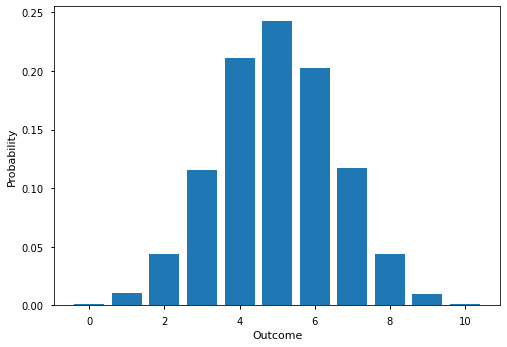

In [8]:
plt.bar(x_i, p_i)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()


Q: How does the probability distribution evolves as a function of the samples? And insteas as a function of the number of elements to distribute between 0 (A) and 1 (B)?

In [9]:
def ElementsInBox(n_particles, N=10000):

  outcomes = binom.rvs(1, 0.5, size=(n_particles,N)).sum(axis=0)
  x_i, c_i = np.unique(outcomes, return_counts=True)
  p_i = c_i / N
  plt.bar(x_i, p_i)
  plt.ylabel("Probability")
  plt.xlabel("Outcome")
  plt.show()

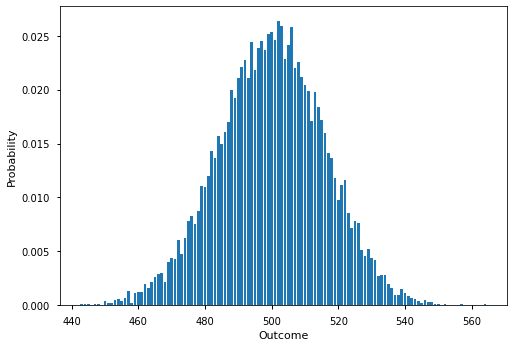

In [10]:
ElementsInBox(1000, N=10000)

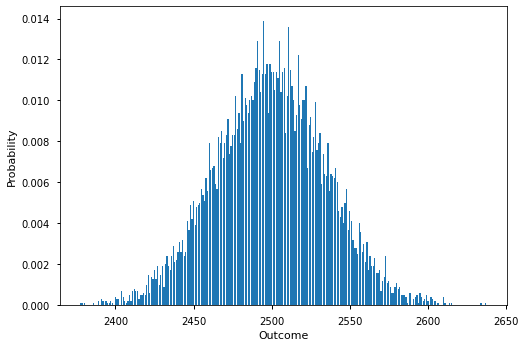

In [11]:
ElementsInBox(5000, N=10000)

What we observe is a manifestation of a very general principle of Nature. Once you have different ways of organizing microstates into macrostates, the multiplicity of each macrostate determines its probability. 

This result can also be shown analytically. For this the Stirling approximation is useful: $\log x! \approx x \log x - x$

Where $x!$ is "x factorial" defined as: $x(x-1)(x-2)(x-3)...2*1$

Q: Make a plot to determine how good this approximation is, using scipy.special.factorial()

In [12]:
from scipy.special import factorial

x = np.logspace(1, 2, 20)
y = factorial(x)
y_stirling = np.exp(x * np.log(x) - x)

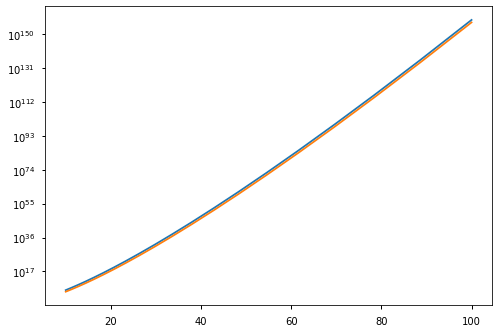

In [13]:
plt.plot(x, y)
plt.plot(x, y_stirling)
plt.yscale("log")
plt.show()